# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from WeatherPy import request_city, make_row, safe_open_w
from scipy.stats import linregress
import os

# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set seed for reproducability (comment out for more random results)
np.random.seed(1)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

str

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
data = []

for index, city in enumerate(cities):
    r = request_city(city)
    if (r.status_code == 200):
        row = make_row(r.json())
        data.append(row)
        cityname = row["name"]
        print(f"Found {cityname}! (#{index+1} of {len(cities)})")
    else:
        print(f"{city} not found.")
print(f"Finished searching.  Found {len(data)} of {len(cities)} cities searched for.")

Found Rikitea! (#1 of 644)
Found Pārsābād! (#2 of 644)
Found Port Alfred! (#3 of 644)
Found Arraial do Cabo! (#4 of 644)
Found Mataura! (#5 of 644)
Found Hermanus! (#6 of 644)
Found Cape Town! (#7 of 644)
Found Geraldton! (#8 of 644)
Found Pisco! (#9 of 644)
Found Acaraú! (#10 of 644)
Found Puerto Ayora! (#11 of 644)
Found Oruzgan! (#12 of 644)
Found Dunedin! (#13 of 644)
Found Yellowknife! (#14 of 644)
Found Albany! (#15 of 644)
Found Bryan! (#16 of 644)
Found Avarua! (#17 of 644)
Found Atuona! (#18 of 644)
Found Bluff! (#19 of 644)
Found New Norfolk! (#20 of 644)
Found Chapais! (#21 of 644)
Found Cherskiy! (#22 of 644)
Found Esperance! (#23 of 644)
Found Vila Franca do Campo! (#24 of 644)
Found Hofn! (#25 of 644)
belushya guba not found.
Found Vaini! (#27 of 644)
Found Punta Arenas! (#28 of 644)
Found Provideniya! (#29 of 644)
taolanaro not found.
Found Menongue! (#31 of 644)
Found Narsaq! (#32 of 644)
Found Betong! (#33 of 644)
Found Half Moon Bay! (#34 of 644)
Found Lebu! (#35 of 6

## (Optional) Import csv of previous execution
#### To skip having to make 600+ web calls during testing of graphs

In [ ]:
# weather_df = pd.read_csv(output_data_file)

## Make DataFrame from data pulled from web

In [24]:
weather_df = pd.DataFrame(data).set_index("name")
weather_df.head(1)

,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
name,,,,,,,,
Rikitea,-23.1203,-134.9692,74.53,74.53,74,10,4.63,1624665845


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
with safe_open_w(output_data_file) as output:
    weather_df.to_csv(output)
weather_df.head(1)

,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
name,,,,,,,,
Rikitea,-23.1203,-134.9692,74.53,74.53,74,10,4.63,1624665845


In [11]:
weather_df.describe()

,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,-9.387486,-10.052036,65.691429,65.227143,71.785714,47.142857,7.725714,1.624664e+09
std,36.154872,119.675133,13.818439,13.506609,14.487016,29.560517,5.277063,7.950907e+01
min,-53.150000,-159.775000,35.710000,35.710000,43.000000,3.000000,1.010000,1.624664e+09
25%,-33.016550,-104.255925,58.682500,58.580000,63.250000,20.000000,3.895000,1.624664e+09
50%,-20.607100,-47.242600,67.640000,67.640000,75.000000,51.000000,6.765000,1.624664e+09
75%,13.439375,108.472100,74.507500,74.427500,81.750000,67.000000,10.495000,1.624664e+09
max,62.456000,168.333300,87.820000,86.050000,92.000000,100.000000,16.110000,1.624664e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

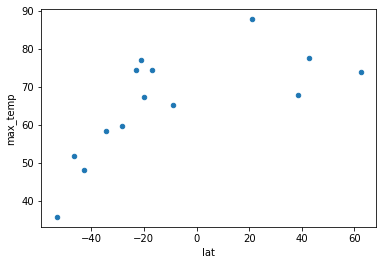

In [13]:
weather_df.plot(kind = "scatter", x="lat", y="max_temp")

## Latitude vs. Humidity Plot

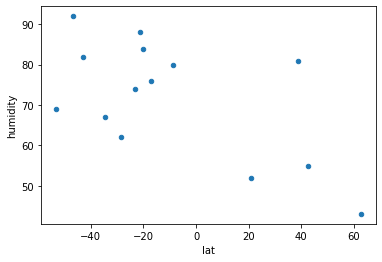

In [14]:
weather_df.plot(kind = "scatter", x="lat", y="humidity")

## Latitude vs. Cloudiness Plot

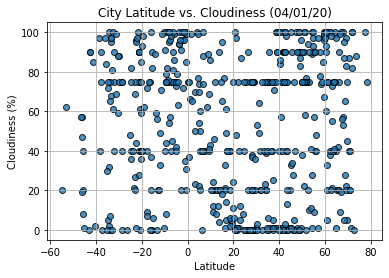

## Latitude vs. Wind Speed Plot

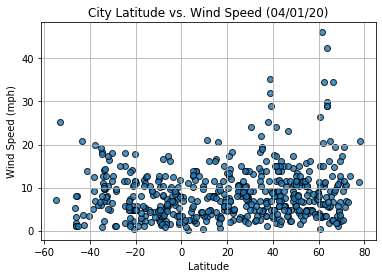

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


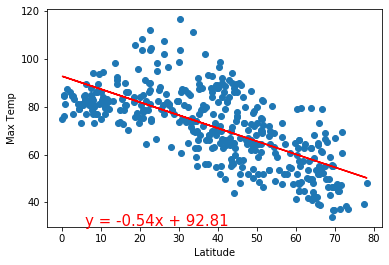

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


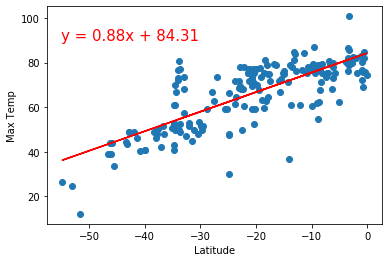

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


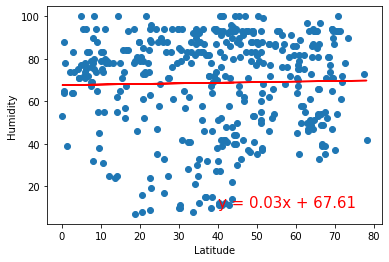

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


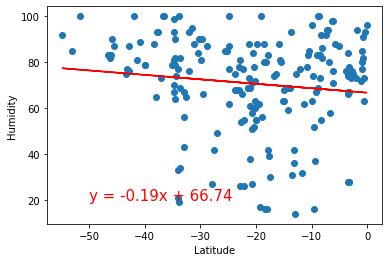

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


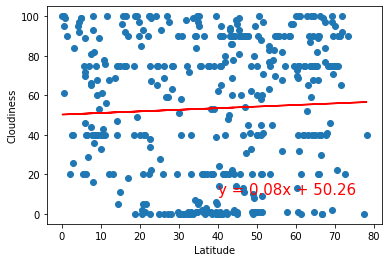

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


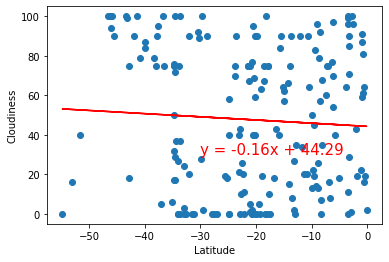

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


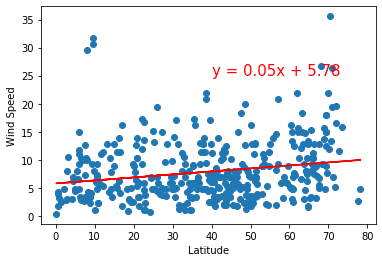

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


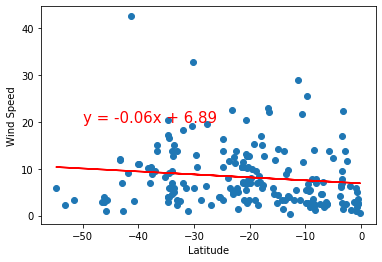